# Import Dataset

In [1]:
import torch
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from torch import optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from torch import nn

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [3]:
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv"
spaceship = pd.read_csv(url)
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
spaceship = spaceship.drop(columns = ['PassengerId', 'Name'])

In [5]:
spaceship

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


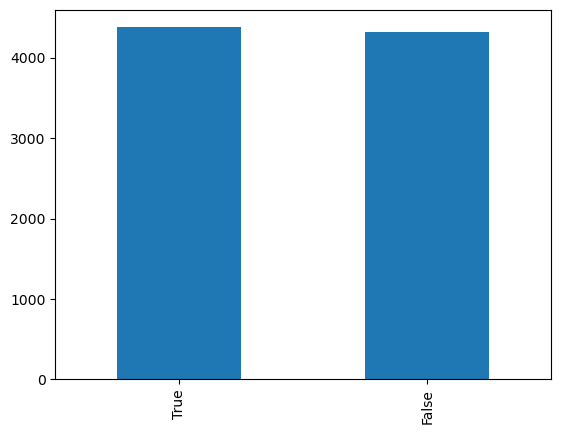

In [6]:
transported = spaceship["Transported"].value_counts()
transported.plot(kind="bar")
plt.show()

In [7]:
spaceship.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [8]:
spaceship.nunique()

HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Transported        2
dtype: int64

In [9]:
spaceship.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [10]:
spaceship.dropna(inplace = True)

In [11]:
spaceship

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [12]:
spaceship["Cabin"] = spaceship["Cabin"].str.split("/").apply(lambda x: x[0])
spaceship["Cabin"].value_counts()

F    2208
G    2019
E     700
B     641
C     599
D     381
A     213
T       3
Name: Cabin, dtype: int64

In [13]:
unique_CryoSleep = spaceship['CryoSleep'].unique()
unique_Cabin = spaceship['Cabin'].unique()
unique_VIP = spaceship['VIP'].unique()
print("unique_CryoSleep is: ", unique_CryoSleep)
print("unique_Cabin is: ", unique_Cabin)
print("unique_VIP is: ", unique_VIP)

unique_CryoSleep is:  [False True]
unique_Cabin is:  ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
unique_VIP is:  [False True]


In [14]:
CryoSleep_dict = {False:0, True:1}
spaceship['CryoSleep'] = spaceship['CryoSleep'].map(CryoSleep_dict)
Cabin_dict = {"A":0, "B":1, "C":2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7}
spaceship['Cabin'] = spaceship['Cabin'].map(Cabin_dict)
VIP_dict = {False:0, True:1}
spaceship['VIP'] = spaceship['VIP'].map(VIP_dict)

In [15]:
spaceship

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,1,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,0,5,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,0,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,0,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,0,5,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,1,6,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,0,6,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,0,4,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False


In [16]:
cat_f = spaceship[["HomePlanet","Destination"]]
num_f = spaceship.drop(columns=["HomePlanet","Destination","Transported"])

In [17]:
cat_f.dtypes

HomePlanet     object
Destination    object
dtype: object

In [18]:
num_f.dtypes

CryoSleep         int64
Cabin             int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [19]:
cat_f_encoded = pd.get_dummies(cat_f, drop_first = True)
cat_f_encoded

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,0,0,1
1,0,0,0,1
2,1,0,0,1
3,1,0,0,1
4,0,0,0,1
...,...,...,...,...
8688,1,0,0,0
8689,0,0,1,0
8690,0,0,0,1
8691,1,0,0,0


In [20]:
features = pd.concat([num_f, cat_f_encoded] ,axis = 1)
target = spaceship['Transported']

In [21]:
features

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
1,0,5,24.0,0,109.0,9.0,25.0,549.0,44.0,0,0,0,1
2,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1
3,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,1
4,0,5,16.0,0,303.0,70.0,151.0,565.0,2.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0
8689,1,6,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
8690,0,6,26.0,0,0.0,0.0,1872.0,1.0,0.0,0,0,0,1
8691,0,4,32.0,0,0.0,1049.0,0.0,353.0,3235.0,1,0,0,0


In [22]:
target

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 6764, dtype: bool

In [23]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [24]:
normalizer = MinMaxScaler()
normalizer.fit(x_train)
x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

In [25]:
x_train_norm = pd.DataFrame(x_train_norm, columns = x_train.columns)
x_train_norm

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,0.571429,0.481013,0.0,0.000000,0.007250,0.000000,0.058372,0.200875,1.0,0.0,0.0,0.0
1,1.0,0.857143,0.481013,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0
2,1.0,0.714286,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
3,0.0,0.857143,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.571429,0.531646,0.0,0.096169,0.000000,0.000082,0.000000,0.000000,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,1.0,0.000000,0.607595,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
5407,1.0,0.857143,0.582278,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
5408,0.0,0.285714,0.341772,0.0,0.000000,0.435631,0.000000,0.003347,0.000000,1.0,0.0,0.0,0.0
5409,0.0,0.714286,0.582278,0.0,0.010585,0.012084,0.000000,0.003213,0.019079,0.0,0.0,0.0,1.0


In [26]:
x_test_norm = pd.DataFrame(x_test_norm, columns = x_test.columns)
x_test_norm

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1.0,0.142857,0.367089,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0
1,1.0,0.857143,0.392405,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
2,1.0,0.857143,0.253165,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0
3,0.0,0.714286,0.291139,0.0,0.000000,0.000000,0.171550,0.000000,0.000000,0.0,0.0,0.0,1.0
4,1.0,0.857143,0.113924,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,0.0,0.714286,0.265823,0.0,0.062298,0.001190,0.000082,0.000089,0.000000,0.0,0.0,0.0,0.0
1349,0.0,0.857143,0.405063,0.0,0.000000,0.011759,0.002530,0.000223,0.026800,0.0,0.0,0.0,1.0
1350,0.0,0.714286,0.253165,0.0,0.055847,0.007034,0.000000,0.116298,0.000000,0.0,0.0,0.0,0.0
1351,1.0,0.285714,0.367089,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0


In [27]:
log_reg = LogisticRegression()

In [28]:
log_reg.fit(x_train_norm, y_train)

LogisticRegression()

In [29]:
log_reg.score(x_test_norm, y_test)

0.7775314116777532

In [30]:
def evaluate_model(model, x_test, y_test, pred):
    print("Accuracy:", model.score(x_test, y_test))
    print(classification_report(y_pred=pred, y_true=y_test))
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print("Precision:", precision)
    print("Recall:", recall)

In [31]:
pred_log_reg = log_reg.predict(x_test_norm)

Accuracy: 0.7775314116777532
              precision    recall  f1-score   support

       False       0.75      0.83      0.79       670
        True       0.81      0.73      0.77       683

    accuracy                           0.78      1353
   macro avg       0.78      0.78      0.78      1353
weighted avg       0.78      0.78      0.78      1353

Precision: 0.8110749185667753
Recall: 0.7291361639824304


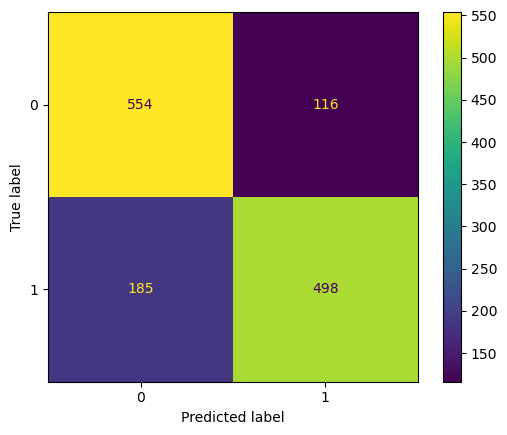

In [32]:
evaluate_model(log_reg, x_test_norm, y_test, pred_log_reg)

In [33]:
log_reg.intercept_

array([-0.14756871])

In [34]:
features.columns

Index(['CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

In [35]:
log_reg.coef_

array([[ 1.75854357,  0.1054493 , -0.88005276, -0.35905599, -6.36012515,
         4.40756265,  4.18041408, -9.3478673 , -8.73332655,  1.38225109,
         0.53966422, -0.42551192, -0.44730648]])

# NN

In [36]:
# Perform Train Test Split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [37]:
# Linear Regression

normalizer = MinMaxScaler()
normalizer.fit(x_train)
x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

In [38]:
y_train_nn = np.array(y_train)
y_test_nn = np.array(y_test)

In [39]:
X_train_tensor = torch.tensor(x_train_norm,  dtype=torch.float32)
X_test_tensor = torch.tensor(x_test_norm,  dtype=torch.float32)

y_train = torch.tensor(y_train_nn, dtype = torch.float32).view(-1,1) # (-1) as much as it takes rows, and (1) is one column
y_test = torch.tensor(y_test_nn, dtype = torch.float32).view(-1,1)

In [40]:
X_train_tensor.shape

torch.Size([5411, 13])

In [41]:
y_train.shape

torch.Size([5411, 1])

#### Creating the NN

In [42]:
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_layer_size1, hidden_layer_size2, output_size):
        super(SimpleNeuralNetwork, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, hidden_layer_size1),
                                     nn.ReLU(),
                                     nn.Linear(hidden_layer_size1, hidden_layer_size2),
                                     nn.ReLU(),
                                     nn.Linear(hidden_layer_size2, output_size),  # Single output for binary classification
                                     nn.Sigmoid())
    def forward(self, x):
        return self.network(x)

In [43]:
my_nn = SimpleNeuralNetwork(13, 8, 4, 1)

In [44]:
# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(my_nn.parameters(), lr=0.001)

# Training the model
epochs = 12000
for epoch in range(epochs):
    my_nn.train()  # Set the model to training mode

    outputs = my_nn(X_train_tensor)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 25 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [25/12000], Loss: 0.6931
Epoch [50/12000], Loss: 0.6901
Epoch [75/12000], Loss: 0.6825
Epoch [100/12000], Loss: 0.6726
Epoch [125/12000], Loss: 0.6616
Epoch [150/12000], Loss: 0.6481
Epoch [175/12000], Loss: 0.6325
Epoch [200/12000], Loss: 0.6165
Epoch [225/12000], Loss: 0.5982
Epoch [250/12000], Loss: 0.5778
Epoch [275/12000], Loss: 0.5601
Epoch [300/12000], Loss: 0.5467
Epoch [325/12000], Loss: 0.5380
Epoch [350/12000], Loss: 0.5322
Epoch [375/12000], Loss: 0.5277
Epoch [400/12000], Loss: 0.5238
Epoch [425/12000], Loss: 0.5203
Epoch [450/12000], Loss: 0.5170
Epoch [475/12000], Loss: 0.5136
Epoch [500/12000], Loss: 0.5102
Epoch [525/12000], Loss: 0.5066
Epoch [550/12000], Loss: 0.5029
Epoch [575/12000], Loss: 0.4989
Epoch [600/12000], Loss: 0.4915
Epoch [625/12000], Loss: 0.4853
Epoch [650/12000], Loss: 0.4811
Epoch [675/12000], Loss: 0.4773
Epoch [700/12000], Loss: 0.4739
Epoch [725/12000], Loss: 0.4708
Epoch [750/12000], Loss: 0.4681
Epoch [775/12000], Loss: 0.4656
Epoch [800/

Epoch [6400/12000], Loss: 0.4019
Epoch [6425/12000], Loss: 0.4019
Epoch [6450/12000], Loss: 0.4018
Epoch [6475/12000], Loss: 0.4018
Epoch [6500/12000], Loss: 0.4018
Epoch [6525/12000], Loss: 0.4018
Epoch [6550/12000], Loss: 0.4017
Epoch [6575/12000], Loss: 0.4017
Epoch [6600/12000], Loss: 0.4017
Epoch [6625/12000], Loss: 0.4017
Epoch [6650/12000], Loss: 0.4017
Epoch [6675/12000], Loss: 0.4016
Epoch [6700/12000], Loss: 0.4016
Epoch [6725/12000], Loss: 0.4016
Epoch [6750/12000], Loss: 0.4016
Epoch [6775/12000], Loss: 0.4016
Epoch [6800/12000], Loss: 0.4016
Epoch [6825/12000], Loss: 0.4015
Epoch [6850/12000], Loss: 0.4015
Epoch [6875/12000], Loss: 0.4015
Epoch [6900/12000], Loss: 0.4015
Epoch [6925/12000], Loss: 0.4014
Epoch [6950/12000], Loss: 0.4014
Epoch [6975/12000], Loss: 0.4014
Epoch [7000/12000], Loss: 0.4013
Epoch [7025/12000], Loss: 0.4013
Epoch [7050/12000], Loss: 0.4013
Epoch [7075/12000], Loss: 0.4013
Epoch [7100/12000], Loss: 0.4013
Epoch [7125/12000], Loss: 0.4013
Epoch [715

Precision: 0.8052851182197497
Recall: 0.8477306002928258
Accuracy: 0.819660014781966


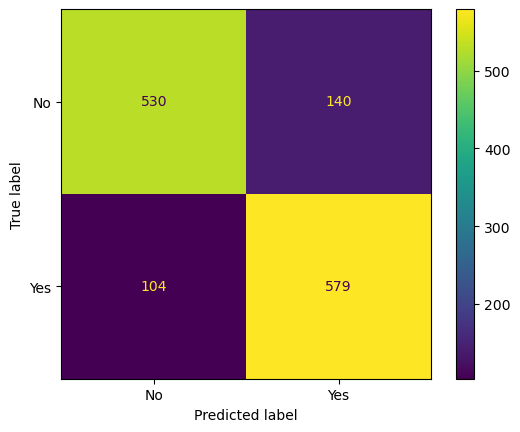

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

my_nn.eval() 

with torch.no_grad():
    predictions = my_nn(X_test_tensor)
    predicted_binary = (predictions >= 0.5).int()

    cm = confusion_matrix(y_test, predicted_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
    disp.plot()
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print("Precision:", precision)
    print("Recall:", recall)
    accuracy = accuracy_score(y_test, predicted_binary)
    print("Accuracy:",accuracy)